# import

In [1]:
import sys
#Change path specificly to your directories
sys.path.insert(1, '/home/codahead/Fishial/FishialReaserch')

# import some common libraries
import albumentations as A
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import logging
import random
import json
import tqdm
import cv2
import os

from pycocotools import mask
import torchvision
import torch

import detectron2
from detectron2.structures import BoxMode
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog
from detectron2.data import build_detection_train_loader
from detectron2.data import transforms as T
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor, launch
from detectron2.data import detection_utils as utils
from detectron2.data.datasets import register_coco_instances
from detectron2.data.datasets import load_coco_json

from module.segmentation_package.src.utils import get_dataset_dicts_sep
from imutils import paths

# import scripts
from module.segmentation_package.src.copy_paste import CopyPaste
from module.segmentation_package.src.coco import CocoDetectionCP
from module.segmentation_package.src.visualize import display_instances
from skimage import measure

from detectron2.utils.logger import setup_logger

setup_logger()


<Logger detectron2 (DEBUG)>

In [2]:
aug_list = [A.Resize(800,800),\
        CopyPaste(blend=True, sigma=1, pct_objects_paste=0.9, p=3) #pct_objects_paste is a guess
    ]


transform = A.Compose(
            aug_list, bbox_params=A.BboxParams(format="coco"))
data = CocoDetectionCP(
    '/home/codahead/Fishial/FishialReaserch/datasets/fishial_collection/Train', 
    '/home/codahead/Fishial/FishialReaserch/datasets/fishial_collection/data_Train.json', 
    transform)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


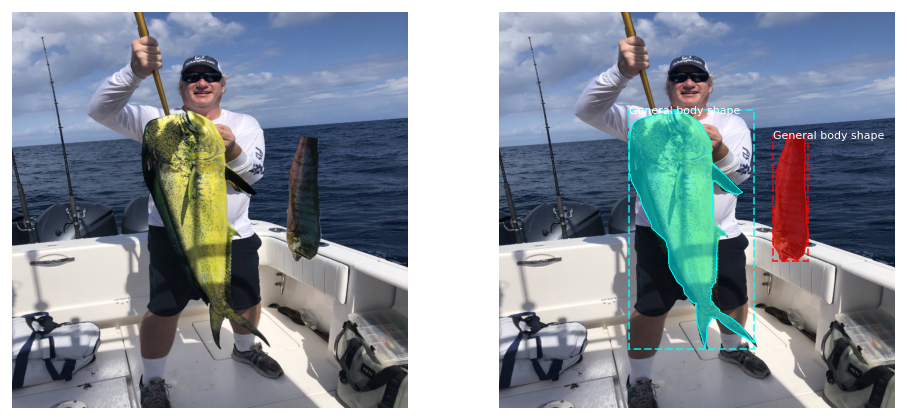

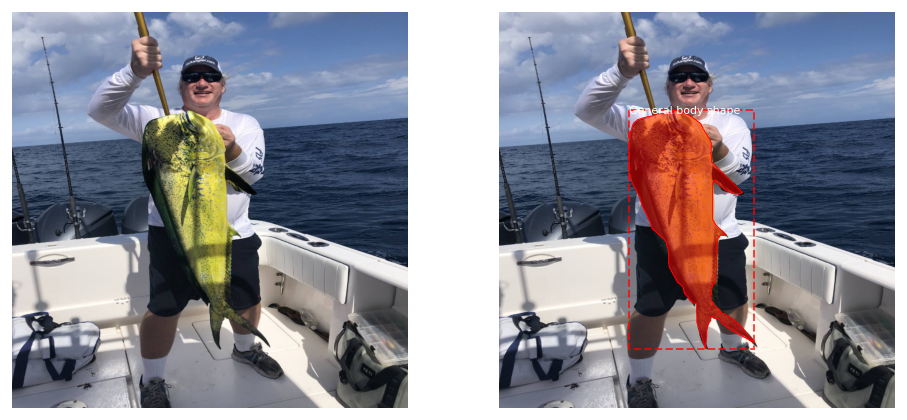

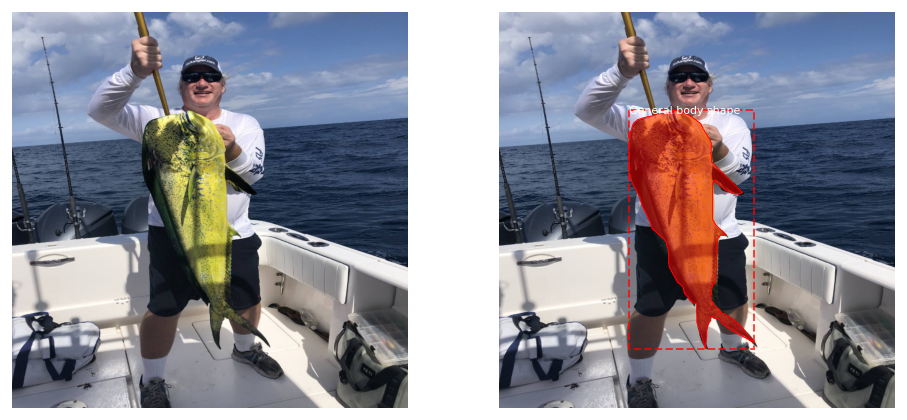

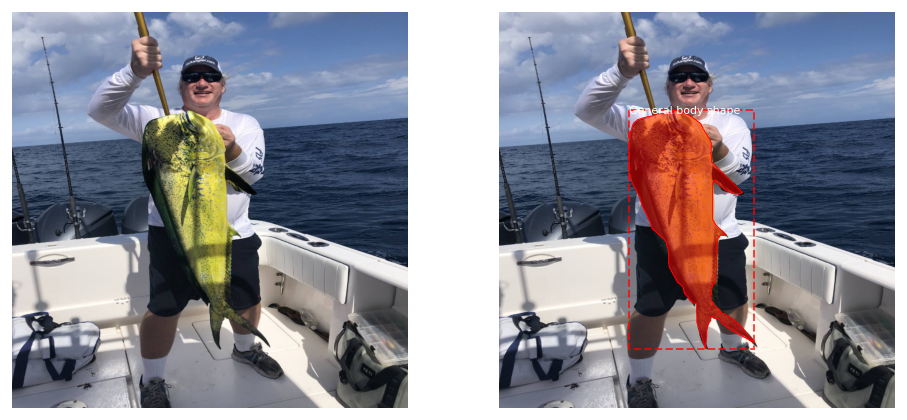

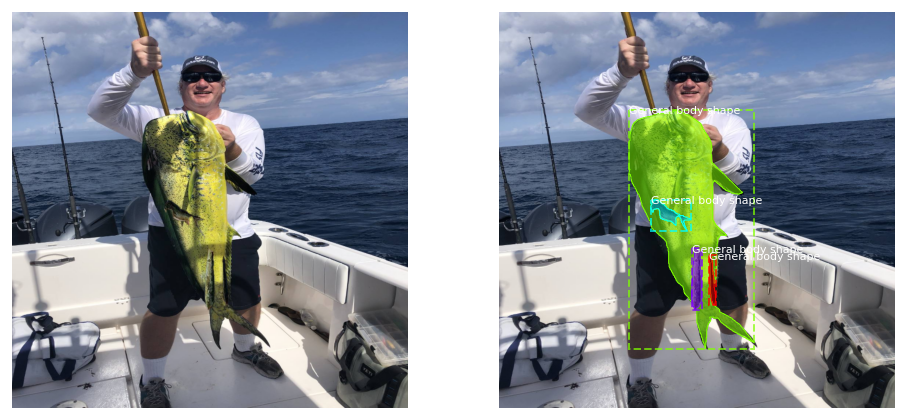

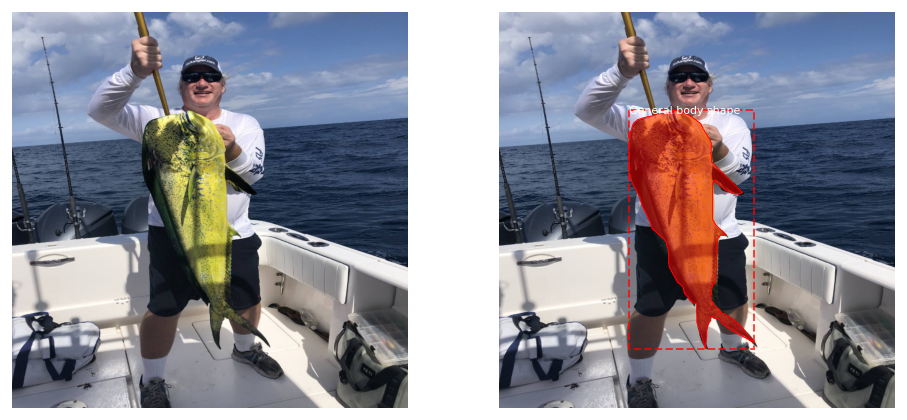

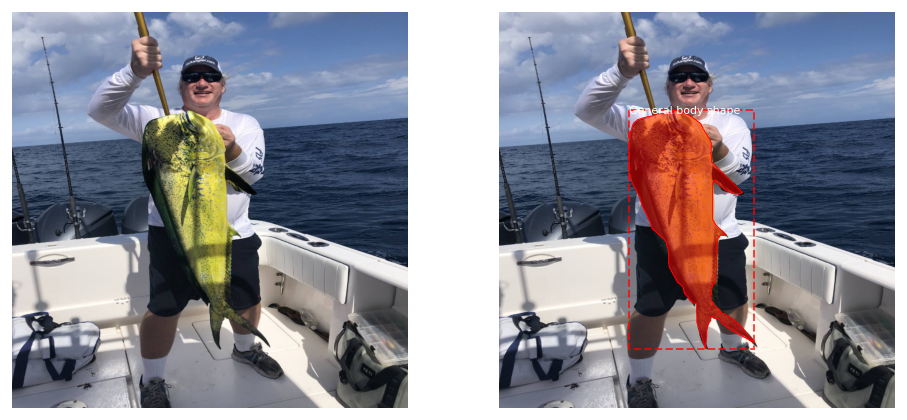

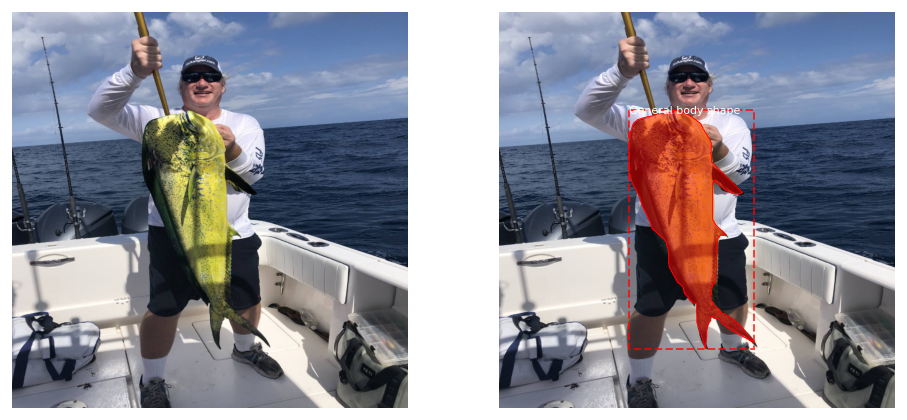

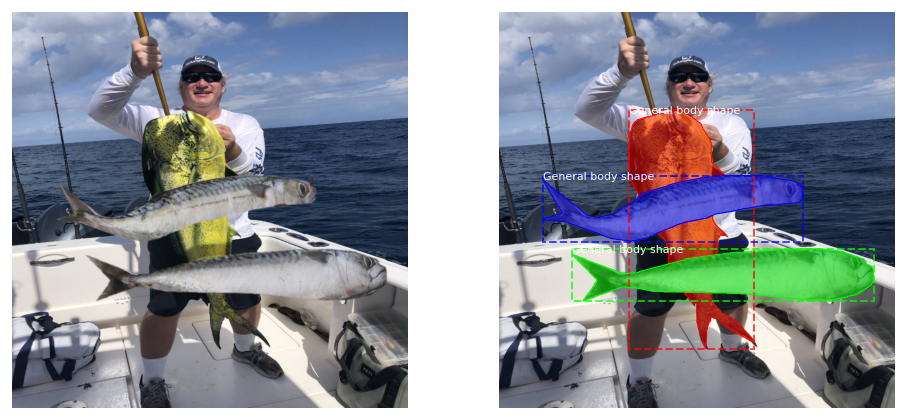

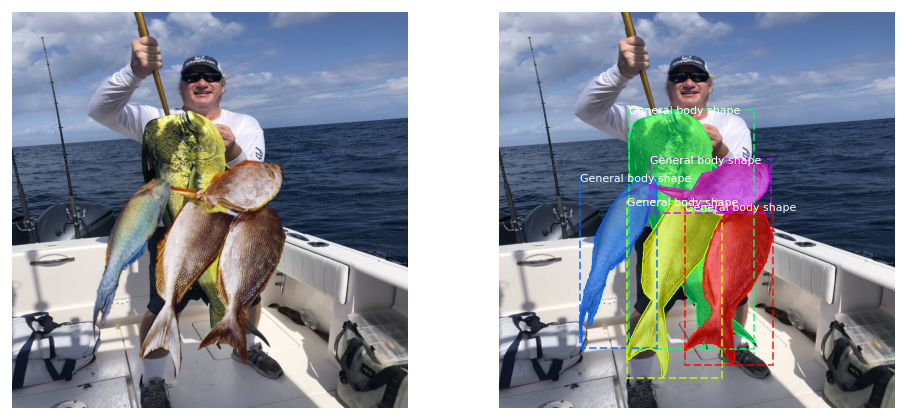

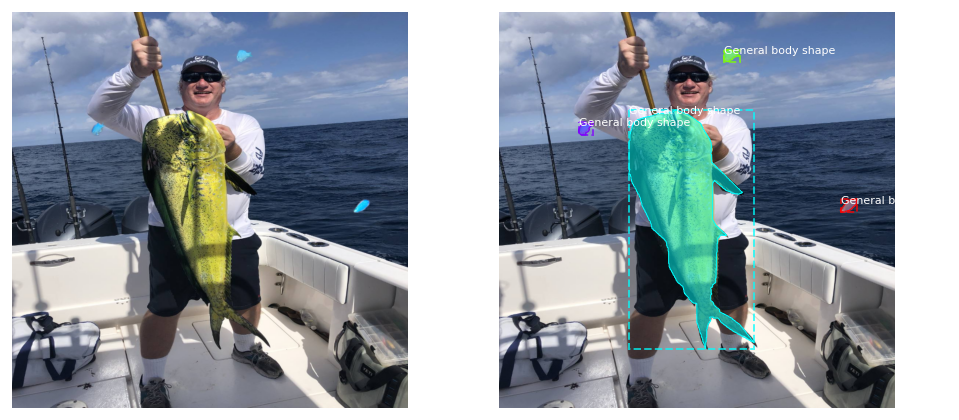

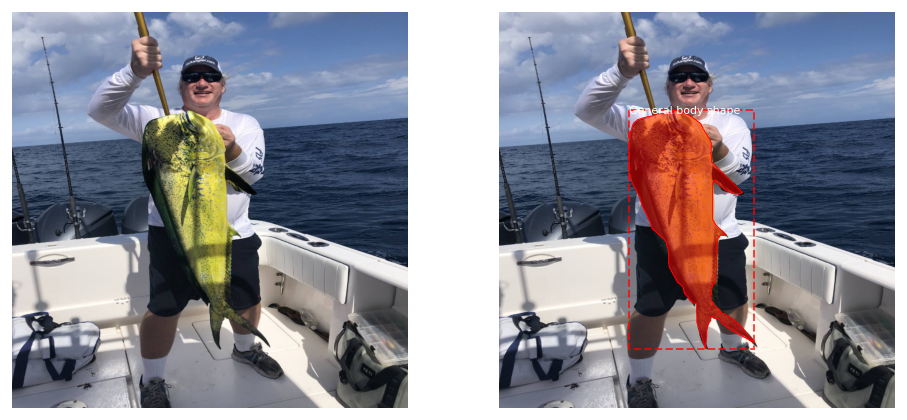

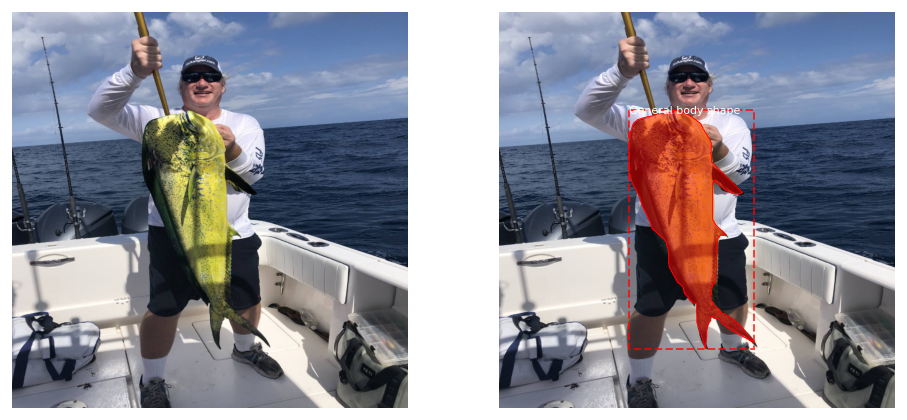

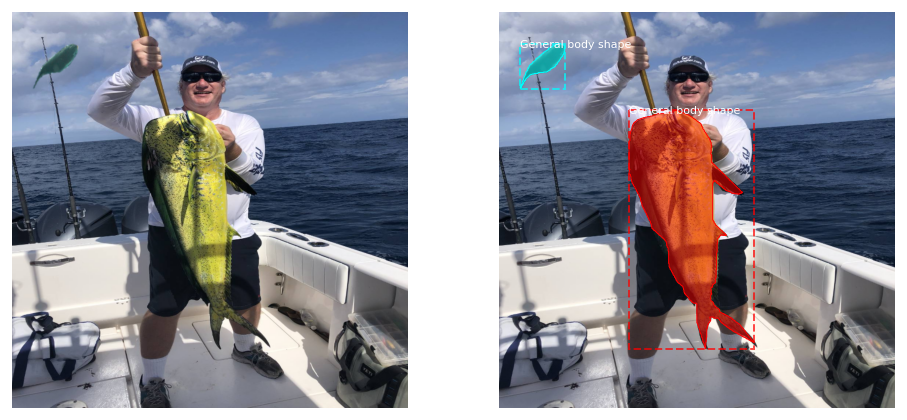

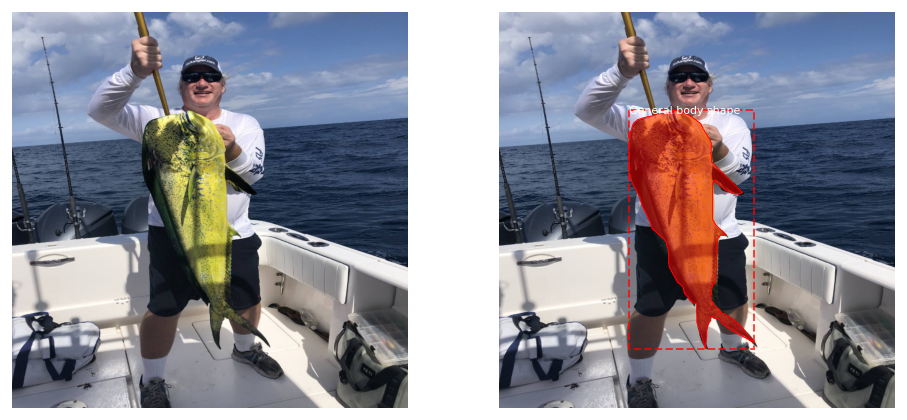

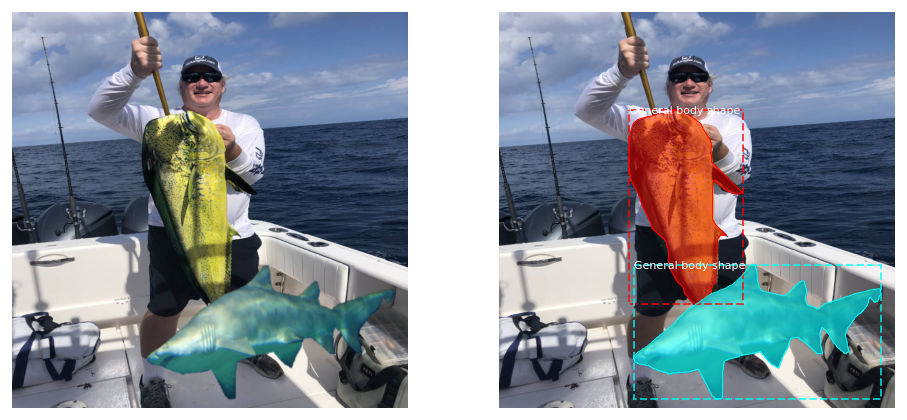

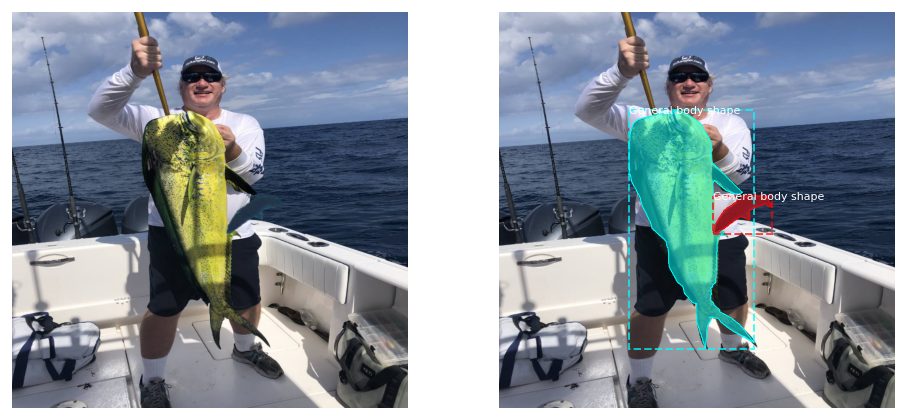

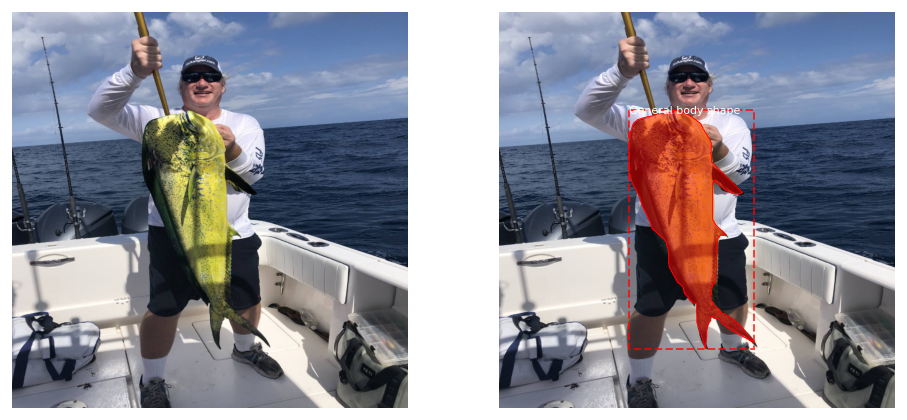

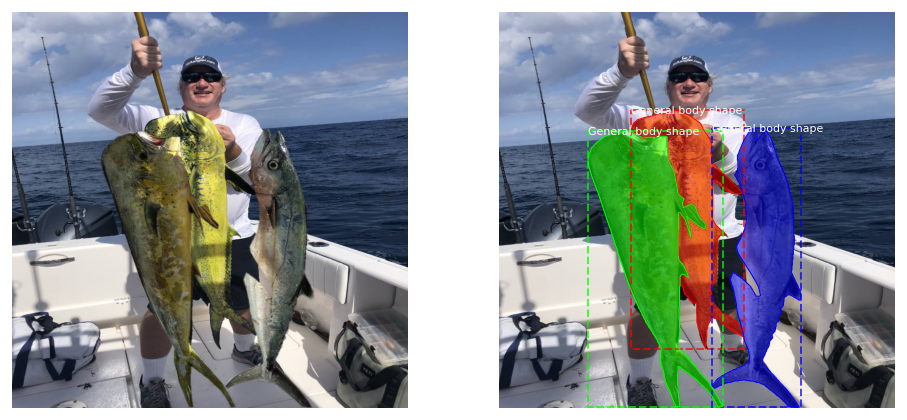

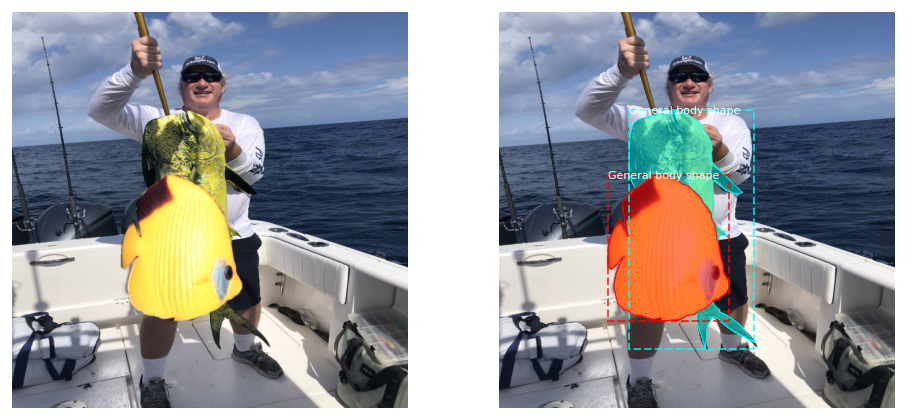

In [3]:
for i in range(20):
    
    img_data = data[0]

    f, ax = plt.subplots(1, 2, figsize=(16, 16))
    image = img_data['image']
    masks = img_data['masks']
    bboxes = img_data['bboxes']
        
    empty = np.array([])
    display_instances(image, empty, empty, empty, empty, show_mask=True, show_bbox=True, ax=ax[0])
            
    if len(bboxes) > 0:
        boxes = np.stack([b[:4] for b in bboxes], axis=0)
        box_classes = np.array([b[-2] for b in bboxes])
        mask_indices = np.array([b[-1] for b in bboxes])
        show_masks = np.stack(masks, axis=-1)[..., mask_indices]
        class_names = {k: data.coco.cats[k]['name'] for k in data.coco.cats.keys()}
        display_instances(image, boxes, show_masks, box_classes, class_names, show_bbox=True, ax=ax[1])